<a href="https://colab.research.google.com/github/Rekhakumari28/AI-ML-MiniProjects/blob/Project_Customer_Segmentation_for_a_Retail_Store/AI_ML_Week3_Project_Customer_Segmentation_for_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Customer Segmentation for a Retail Store

 **Type:** Customer Segmentation

 **Techniques Used:** K-Means, Elbow Method

**Dataset:** Mall Customers Dataset (Kaggle)

**Presented By:** Rekha Kumari Bheel

### Github Link : [Link](https://github.com/Rekhakumari28/AI-ML-MiniProjects/blob/main/AI_ML_Week3_Project_Customer_Segmentation_for_a_Retail_Store.ipynb)

## Objective

The objective of this project is to perform customer segmentation for a retail store using the Mall Customers dataset. By applying K-Means clustering and the Elbow Method, we aim to group customers into distinct segments based on their annual income and spending behavior.

This segmentation will help the retail store:

* Identify different customer groups (e.g., high-income high-spenders, low-income low-spenders).

* Understand customer purchasing patterns and lifestyle differences.

* Design personalized marketing strategies and targeted promotions.

* Improve customer satisfaction and business growth through data-driven insights.

## Problem Statement

Retail businesses often struggle to understand customer behavior and predict how different customers spend based on their demographics and income. In today’s competitive market, a one-size-fits-all strategy for marketing or customer engagement is ineffective.

The challenge is:

* Customers differ in age, income, and lifestyle.

* Their spending patterns are non-linear and not easy to capture with simple analysis.

* Businesses need a data-driven approach to segment customers and predict spending behavior in order to improve marketing strategies, product recommendations, and customer retention.

This project aims to address these challenges by:

* Using regression models (Linear, Ridge, Lasso, Elastic Net) to build interpretable baselines.

* Applying tree-based models (Decision Tree, Random Forest, Extra Trees, Gradient Boosting, XGBoost, LightGBM, CatBoost) to capture complex, non-linear spending patterns.

* Evaluating models using MSE and R² Score to identify the best-performing approach.

* Generating business insights to help the retail store design targeted marketing strategies and personalized offers.

Hence, the problem is:

`“How can we divide customers into meaningful segments so that businesses can better understand their needs, spending habits, and income levels, and thereby provide more targeted services and marketing strategies?”`

## Expected Outcomes

By the end of this project, we expect to achieve:

### Clustered Customer Groups

Identify distinct customer groups such as:

* **High Income – High Spending (Premium Customers)**

* **High Income – Low Spending (Potential Customers)**

* **Low Income – High Spending (Budget Shoppers)**

* **Low Income – Low Spending (Low Value Customers)**

### Visualizations

* Scatter plots and cluster diagrams showing customer segments.

### Business Insights

* Data-driven recommendations for personalized marketing.

* Guidance for customer retention and upselling strategies.

## Scalable Model

* A reusable clustering approach that can be applied to new customer data.

## Supervised Machine Learning Algorithms

This project provides an overview and implementation of popular Supervised Machine Learning Algorithms.
Supervised learning is a type of machine learning where the model is trained on labeled data to make predictions or classifications.

## Algorithms

1. **Linear Models**

    * **Linear Regression –** Predicts continuous values using a straight-line relationship.

     * **Logistic Regression –** Used for binary/multiclass classification tasks.

     * **Ridge Regression (L2 Regularization) –** Penalizes large coefficients to reduce overfitting.

      * **Lasso Regression (L1 Regularization) –** Performs feature selection by shrinking some coefficients to zero.

    * **Elastic Net Regression –** Combination of L1 and L2 regularization.

2.  **Tree-Based Algorithms**

    * **Decision Trees –** Tree-structured models for classification and regression.

    * **Random Forest –** Ensemble of decision trees using bagging.

    * **Extra Trees (Extremely Randomized Trees) –** Similar to Random Forest but with more randomness.

    * **Gradient Boosting Machines (GBM) –** Builds models sequentially to reduce errors.

    * **XGBoost (Extreme Gradient Boosting) –** Optimized and regularized boosting technique.

    * **LightGBM –** Gradient boosting framework designed for speed and efficiency.

    * **CatBoost –** Gradient boosting with categorical feature support.

## Setup & Imports

In [2]:
# Install libraries (only once in Colab)
!pip install xgboost lightgbm catboost

# Common
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression

# Tree-Based Models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
# Boosting Libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


## Load Data from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')
print("Dataset shape:", df.shape)
df.head()

# Clean column names
df.columns = df.columns.str.strip()
print("Columns:", df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (200, 5)
Columns: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


## Define Dataset & Clean

In [4]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Select features (X) and target (y)
X = df[['Age', 'Annual Income (k$)']]       # Predictors
y = df['Spending Score (1-100)']            # Target

print("Feature Sample:\n", X.head())
print("\nTarget Sample:\n", y.head())


Feature Sample:
    Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17

Target Sample:
 0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64


## Numeric Preprocessing Pipeline

In [5]:
print(" Step 1: Define Target and Features")
target_col = "Spending Score (1-100)"   # Our target
X = df.drop(columns=[target_col, "CustomerID"])   # drop target + ID
y = df[target_col]
print("    Features Selected:", list(X.columns))
print("    Target:", target_col)

print("\n Step 2: Select Numeric Columns")
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
print("    Numeric Columns:", list(num_cols))

print("\n Step 3: Build Numeric Pipeline")
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # handle missing values
    ("scaler", StandardScaler())                     # standardize
])
print("    Pipeline: Median Imputation + Standardization")

print("\n Step 4: Apply ColumnTransformer")
preprocess = ColumnTransformer(
    transformers=[("num", numeric_pipeline, num_cols)],
    remainder="drop"   # drop non-numeric
)
print("    ColumnTransformer Ready!")

print("\n Data Preprocessing Pipeline Setup Complete!")


 Step 1: Define Target and Features
    Features Selected: ['Genre', 'Age', 'Annual Income (k$)']
    Target: Spending Score (1-100)

 Step 2: Select Numeric Columns
    Numeric Columns: ['Age', 'Annual Income (k$)']

 Step 3: Build Numeric Pipeline
    Pipeline: Median Imputation + Standardization

 Step 4: Apply ColumnTransformer
    ColumnTransformer Ready!

 Data Preprocessing Pipeline Setup Complete!


## Train/Test Split

In [6]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (160, 3)
Test set size: (40, 3)


## Linear Regression Model + Evaluation

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report

# Part 1: Regression (Spending Score)

# Features for regression (drop ID, Genre, and target)
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict
y_pred = reg_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Evaluation (regression)
print("=== Regression Results (Spending Score) ===")
print("Prediction values (for test set):", y_pred[:10])
print("Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("\n")

# Part 2: Classification (Genre)

# Features for classification (drop ID and Genre only)
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)

# Predict
yc_pred = clf.predict(Xc_test)

# Evaluation (classification)
print("=== Classification Results (Genre) ===")
print("Confusion Matrix:\n", confusion_matrix(yc_test, yc_pred))
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))


=== Regression Results (Spending Score) ===
Prediction values (for test set): [60.53107371 59.61532685 37.74581617 55.58060323 40.4817971  63.7393247
 55.18843905 52.51607607 45.49693117 59.43155008]
Coefficients: [-0.58929193  0.05235827]
Intercept: 71.53258395331329
Mean Squared Error: 483.5568217540833
R2 Score: 0.019631778132180422


=== Classification Results (Genre) ===
Confusion Matrix:
 [[20  1]
 [18  1]]
Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40



### Visualization (3-in-1)

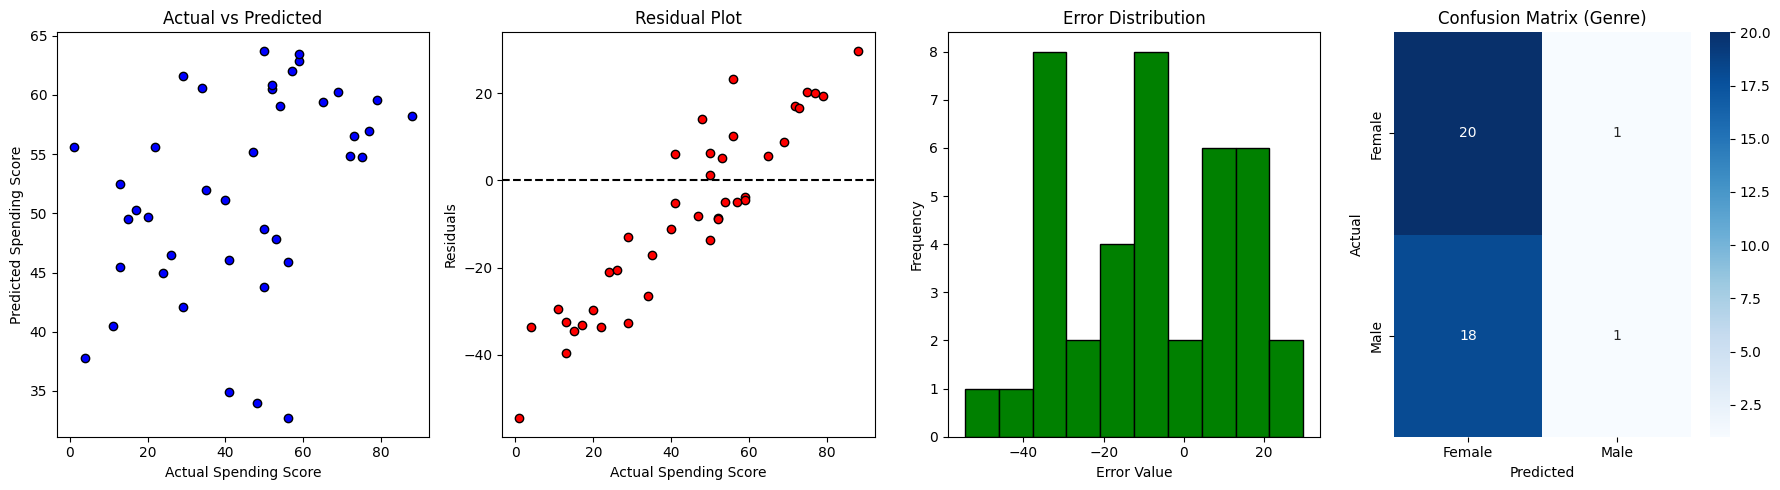

In [10]:
plt.figure(figsize=(18, 5))
cm = confusion_matrix(yc_test, yc_pred)

# Plot 1: Actual vs Predicted (Regression)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Actual vs Predicted")

# Plot 2: Residual Plot (Regression)
plt.subplot(1, 4, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Plot 3: Error Distribution (Regression)
plt.subplot(1, 4, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Error Distribution")

# Plot 4: Confusion Matrix (Classification)
plt.subplot(1, 4, 4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Genre)")

plt.tight_layout()
plt.show()

## Ridge Regression – Model + Evaluation

In [13]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)   # L2 regularization parameter
ridge_model.fit(X_train, y_train)

# Predict
y_pred = ridge_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Evaluation (regression)
print("=== Ridge Regression Results (Spending Score) ===")
print("Prediction values (first 10):", y_pred[:10])
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("\n")

# =============================
# Part 2: Classification (Genre)
# =============================

# Features for classification (drop ID and Genre only)
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)

# Predict
yc_pred = clf.predict(Xc_test)

# Evaluation (classification)
print("=== Classification Results (Genre) ===")
cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))


=== Ridge Regression Results (Spending Score) ===
Prediction values (first 10): [60.53078614 59.61500888 37.74622927 55.5805049  40.48218251 63.73893964
 55.18830827 52.51609164 45.49717805 59.43126681]
Coefficients: [-0.58927264  0.05235806]
Intercept: 71.53184564293637
Mean Squared Error: 483.55727694122396
R² Score: 0.019630855280950432


=== Classification Results (Genre) ===
Confusion Matrix:
 [[20  1]
 [18  1]]
Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40



### Visualization (3-in-1)

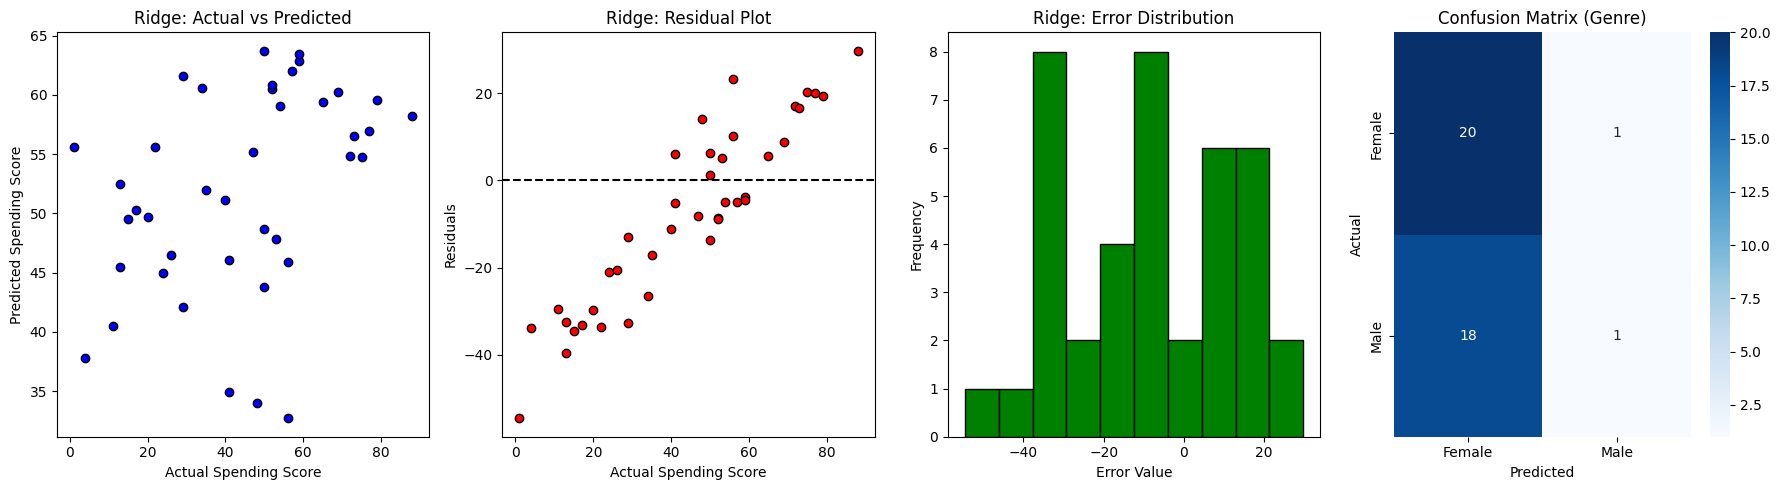

In [14]:
plt.figure(figsize=(18, 5))

# Plot 1: Actual vs Predicted (Regression)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Ridge: Actual vs Predicted")

# Plot 2: Residual Plot (Regression)
plt.subplot(1, 4, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Ridge: Residual Plot")

# Plot 3: Error Distribution (Regression)
plt.subplot(1, 4, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Ridge: Error Distribution")

# Plot 4: Confusion Matrix (Classification)
plt.subplot(1, 4, 4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Genre)")

plt.tight_layout()
plt.show()

## Lasso Regression - Model + Evaluation

In [15]:
# Features for regression
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)   # L1 regularization parameter
lasso_model.fit(X_train, y_train)

# Predict
y_pred = lasso_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Evaluation (regression)
print("=== Lasso Regression Results (Spending Score) ===")
print("Prediction values (first 10):", y_pred[:10])
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("\n")

# =============================
# Part 2: Classification (Genre)
# =============================

# Features for classification (drop ID and Genre only)
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)

# Predict
yc_pred = clf.predict(Xc_test)

# Evaluation (classification)
print("=== Classification Results (Genre) ===")
cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))

=== Lasso Regression Results (Spending Score) ===
Prediction values (first 10): [60.52342599 59.61175505 37.76065172 55.57583547 40.49087481 63.72844781
 55.18646921 52.51326631 45.50021004 59.42658616]
Coefficients: [-0.5887739   0.05223047]
Intercept: 71.52017138072237
Mean Squared Error: 483.5301530073113
R² Score: 0.01968584663183981


=== Classification Results (Genre) ===
Confusion Matrix:
 [[20  1]
 [18  1]]
Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40



### Visualization (3-in-1 plots)

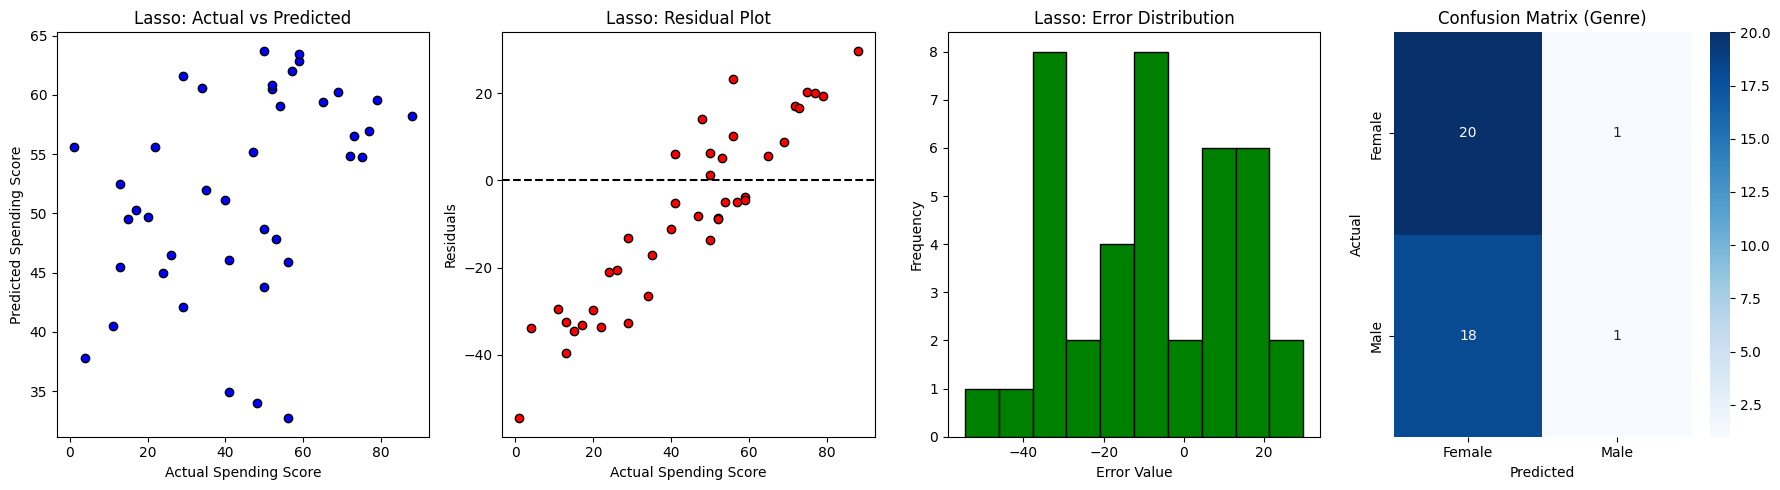

In [16]:

plt.figure(figsize=(18, 5))

# Plot 1: Actual vs Predicted (Regression)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Lasso: Actual vs Predicted")

# Plot 2: Residual Plot (Regression)
plt.subplot(1, 4, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Lasso: Residual Plot")

# Plot 3: Error Distribution (Regression)
plt.subplot(1, 4, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Lasso: Error Distribution")

# Plot 4: Confusion Matrix (Classification)
plt.subplot(1, 4, 4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Genre)")

plt.tight_layout()
plt.show()

## Logistic Regression - Model + Evaluation

In [21]:
# =============================
# Logistic Regression (Genre Classification)
# =============================

# Features for classification (drop ID and Genre only)
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xc_train, yc_train)

# Predict
yc_pred = log_reg.predict(Xc_test)

# ===============================
# Evaluation
# ===============================
print("=== Logistic Regression Results (Genre) ===")
print("Prediction values (first 10):", yc_pred[:10])

# Show only first 10 coefficients neatly
coef_df = pd.DataFrame(log_reg.coef_, columns=Xc_train.columns)
print("\nCoefficients (first 10 rows):")
print(coef_df.T.head(10))   # show 10 rows only

print("\nIntercept:", log_reg.intercept_)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred))

# Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

=== Logistic Regression Results (Genre) ===
Prediction values (first 10): ['Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female']

Coefficients (first 10 rows):
                               0
Age                     0.003599
Annual Income (k$)      0.005246
Spending Score (1-100) -0.001918

Intercept: [-0.63723825]
Accuracy: 0.525

Classification Report:
               precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40

Confusion Matrix:
 [[20  1]
 [18  1]]


### Visualization (Confusion Matrix)

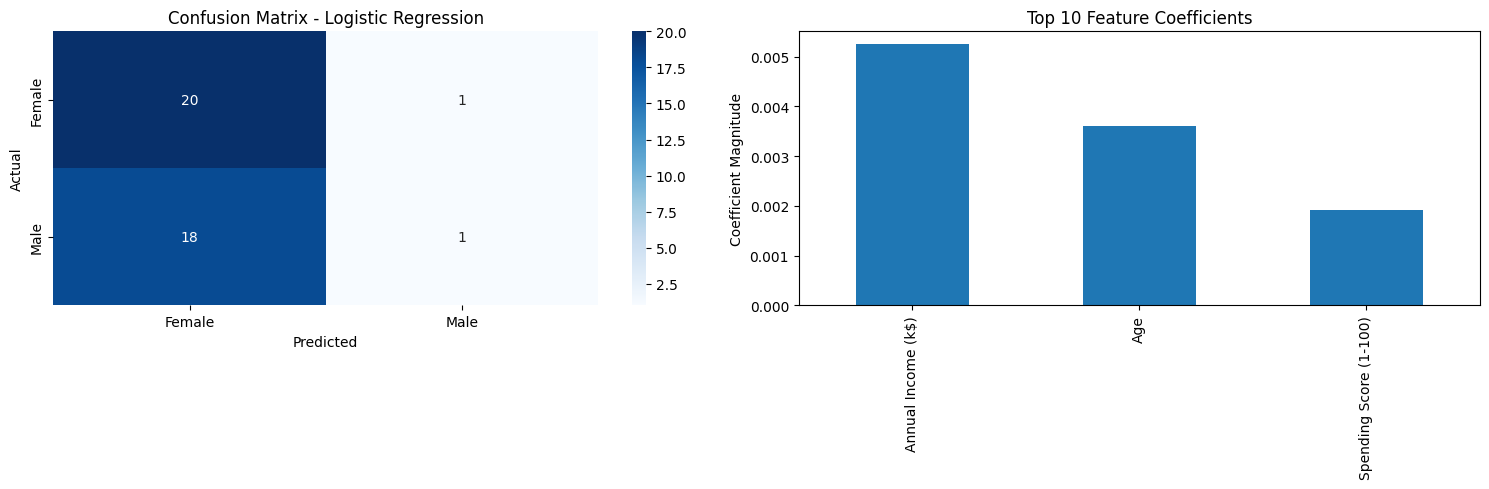

In [22]:
plt.figure(figsize=(15, 5))

# Plot 1: Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")

# Plot 2: Top 10 Coefficients
top_coef = coef_df.T.abs().nlargest(10, 0)  # pick largest absolute coefficients
top_coef.plot(kind="bar", legend=False, ax=plt.subplot(1, 2, 2))
plt.title("Top 10 Feature Coefficients")
plt.ylabel("Coefficient Magnitude")

plt.tight_layout()
plt.show()

 ## Elastic Net Regression - Model + Evaluation

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report

# =============================
# Part 1: Elastic Net Regression (Spending Score)
# =============================

# Features for regression
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Elastic Net Regression model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.7, random_state=42)
elastic_model.fit(X_train, y_train)

# Predict
y_pred = elastic_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Evaluation (regression)
print("=== Elastic Net Regression Results (Spending Score) ===")
print("Predictions (first 10):", y_pred[:10])
print("Coefficients:", elastic_model.coef_)
print("Intercept:", elastic_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("\n")

# =============================
# Part 2: Classification (Genre)
# =============================

# Features for classification (drop ID and Genre only)
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)

# Predict
yc_pred = clf.predict(Xc_test)

# Evaluation (classification)
print("=== Classification Results (Genre) ===")
cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))


=== Elastic Net Regression Results (Spending Score) ===
Predictions (first 10): [60.51088183 59.60325699 37.78290531 55.56917843 40.50639775 63.71095104
 55.18242324 52.51039985 45.50736429 59.41705557]
Coefficients: [-0.58792688  0.05208696]
Intercept: 71.49590898323228
Mean Squared Error: 483.5076430652669
R² Score: 0.019731483526747806


=== Classification Results (Genre) ===
Confusion Matrix:
 [[20  1]
 [18  1]]
Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40



### Visualization

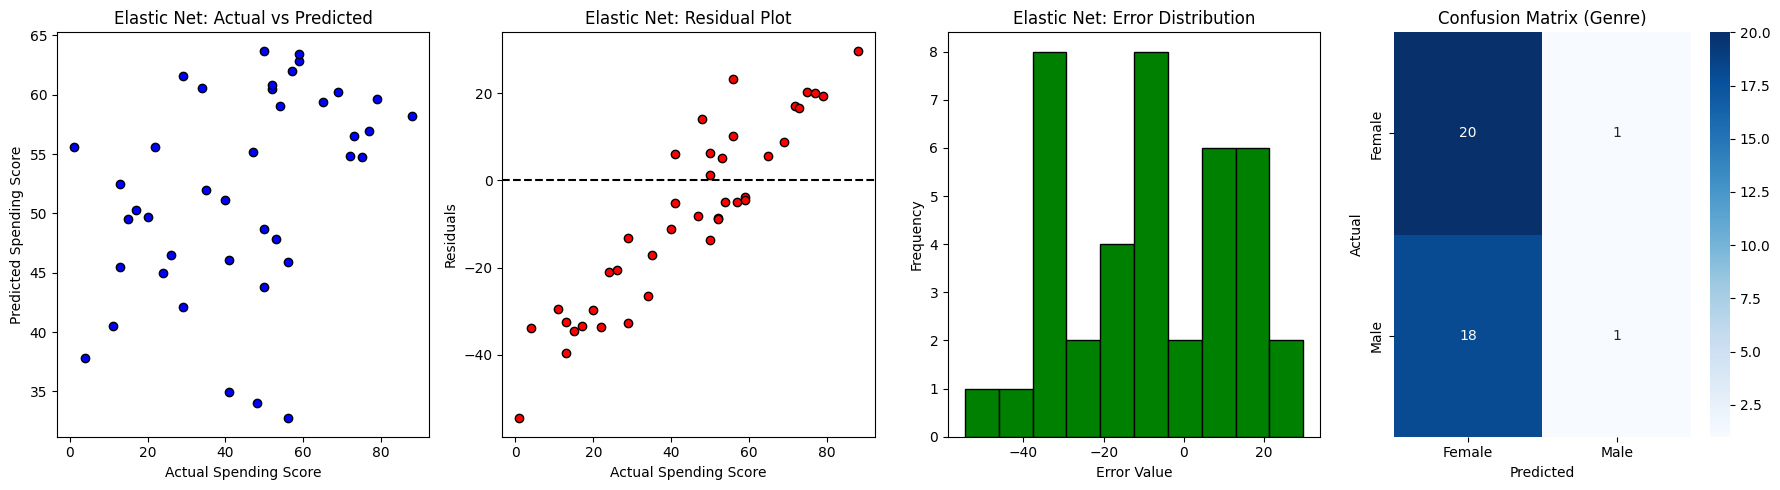

In [25]:

plt.figure(figsize=(18, 5))

# Plot 1: Actual vs Predicted (Regression)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Elastic Net: Actual vs Predicted")

# Plot 2: Residual Plot (Regression)
plt.subplot(1, 4, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Elastic Net: Residual Plot")

# Plot 3: Error Distribution (Regression)
plt.subplot(1, 4, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Elastic Net: Error Distribution")

# Plot 4: Confusion Matrix (Classification)
plt.subplot(1, 4, 4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Genre)")

plt.tight_layout()
plt.show()

## Tree-Based Models Workflow

### Decision Tree Regression (Spending Score)

Decision Tree Regression Results
Predictions (first 10): [41. 76. 14. 90. 15. 46. 42. 91. 35. 92.]
MSE: 764.675
R² Score: -0.5503101938204527

Top 10 Feature Importances:
 Age                   0.544394
Annual Income (k$)    0.455606
dtype: float64


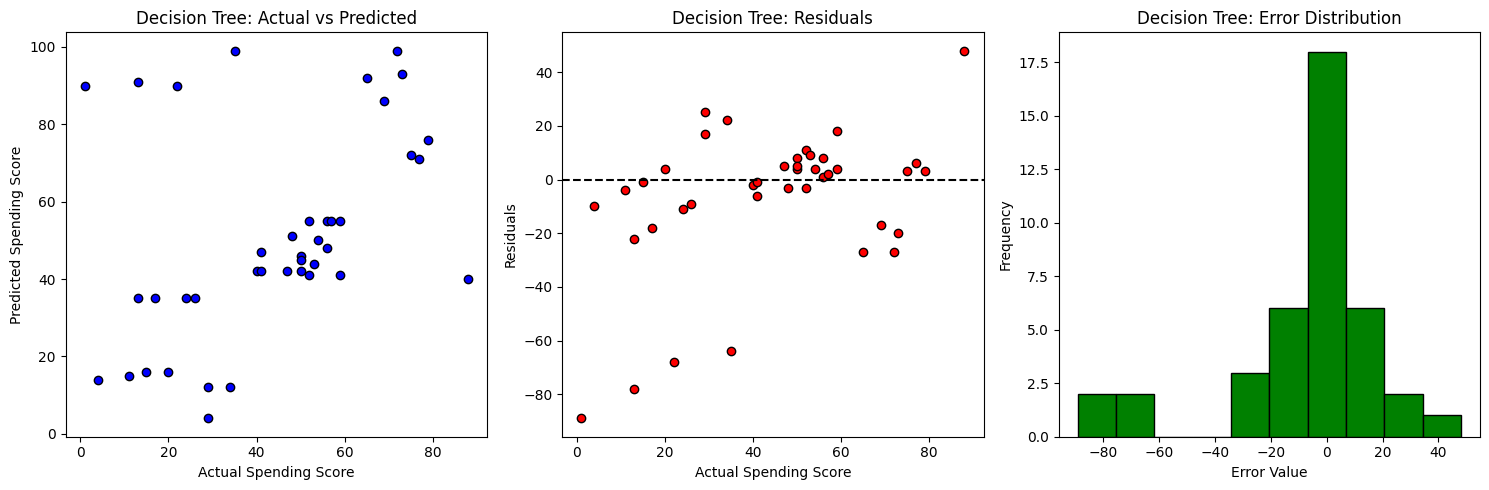


Decision Tree Classification Results
Predictions (first 10): ['Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

      Female       0.54      0.62      0.58        21
        Male       0.50      0.42      0.46        19

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.52      0.53      0.52        40

Confusion Matrix:
 [[13  8]
 [11  8]]


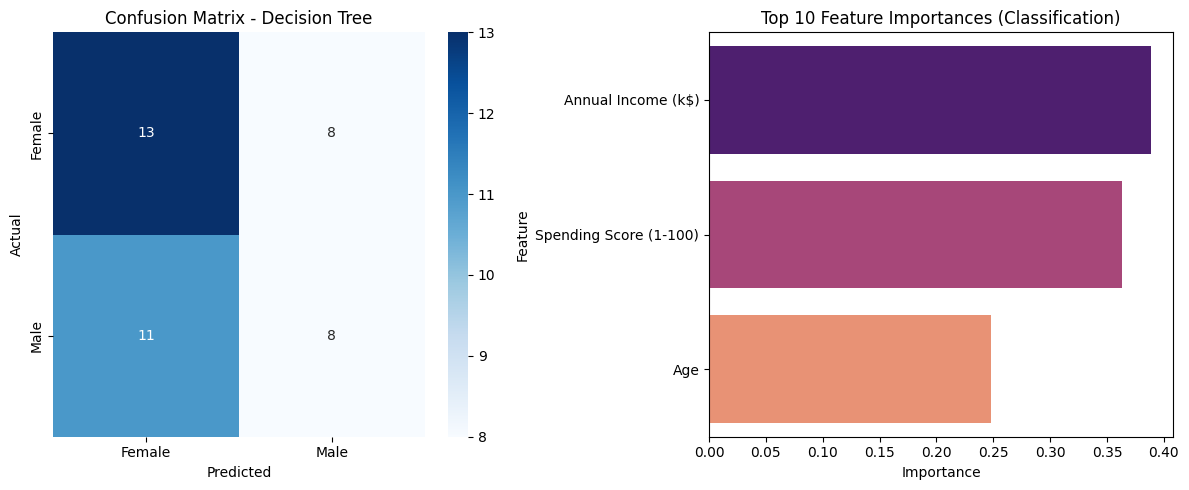

In [30]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# =============================
# Decision Tree Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)
residuals = y_test - y_pred

print("Decision Tree Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(dt_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Decision Tree: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Decision Tree: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Decision Tree: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# Decision Tree Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(Xc_train, yc_train)

yc_pred = dt_cls.predict(Xc_test)

print("\nDecision Tree Classification Results")
print("="*40)
print("Predictions (first 10):", yc_pred[:10])
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_cls.classes_, yticklabels=dt_cls.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")

importances_cls = pd.Series(dt_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### Random Forest Regression (Spending Score)

Random Forest Regression Results
Predictions (first 10): [44.63       76.92       13.47       84.04833333 21.32       48.12
 50.91       63.224      23.46       71.59      ]
MSE: 478.8813484029798
R² Score: 0.029110882323047926

Top 10 Feature Importances:
 Age                   0.506322
Annual Income (k$)    0.493678
dtype: float64


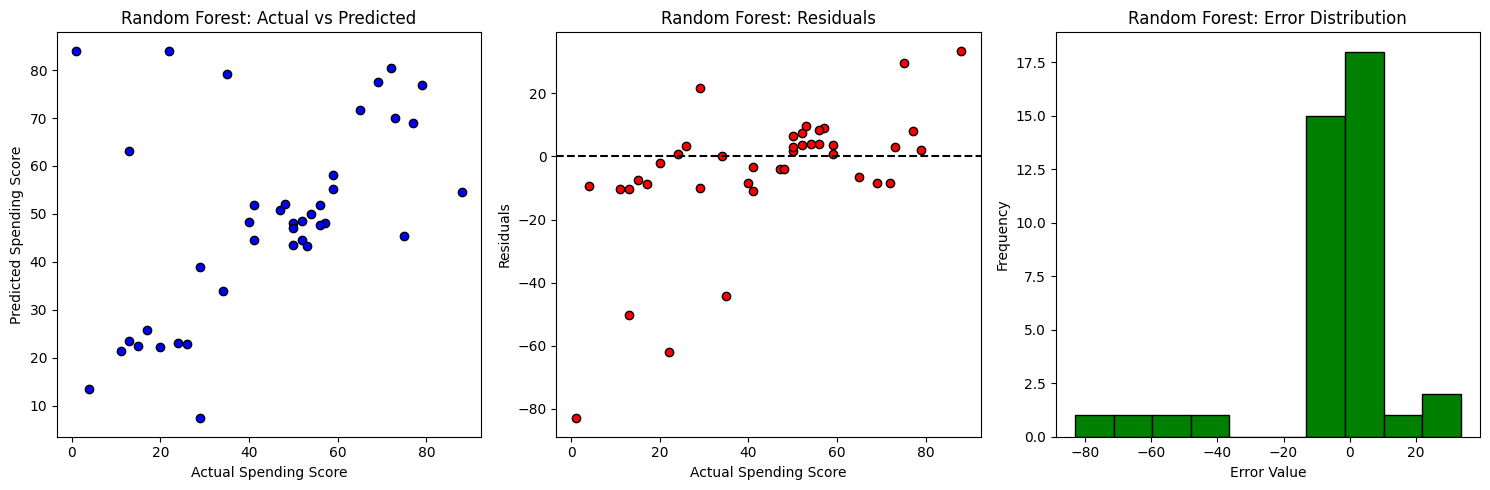


Random Forest Classification Results
Predictions (first 10): ['Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.76      0.68        21
        Male       0.64      0.47      0.55        19

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40

Confusion Matrix:
 [[16  5]
 [10  9]]


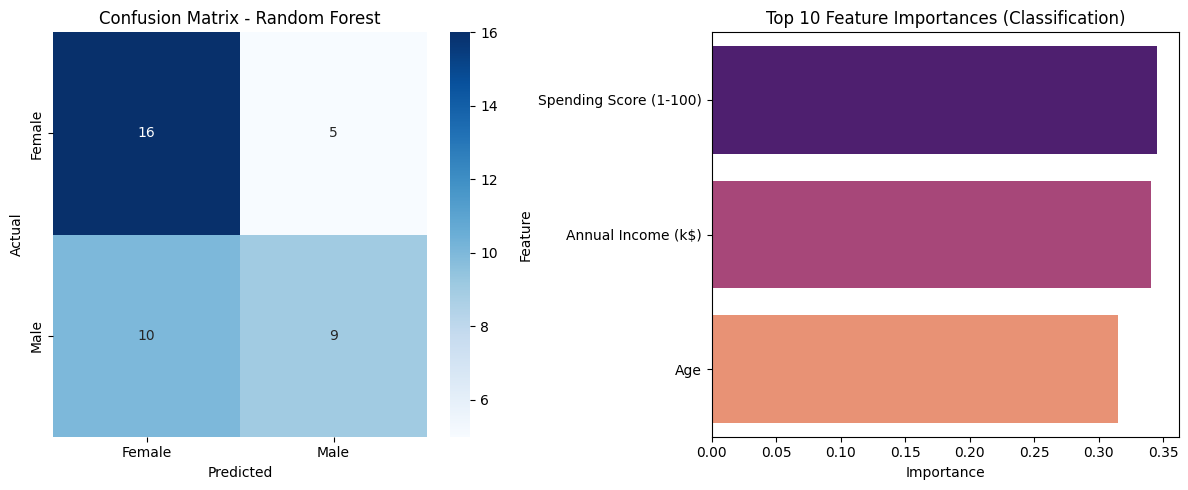

In [31]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# =============================
# Random Forest Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
residuals = y_test - y_pred

print("Random Forest Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Random Forest: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Random Forest: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# Random Forest Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(Xc_train, yc_train)

yc_pred = rf_cls.predict(Xc_test)

print("\nRandom Forest Classification Results")
print("="*40)
print("Predictions (first 10):", yc_pred[:10])
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_cls.classes_, yticklabels=rf_cls.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

importances_cls = pd.Series(rf_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### Random Forest Regression (Spending Score)

Extra Trees Regression Results
Predictions (first 10): [48.33       77.14       22.52833333 90.         21.51       43.24
 50.9        72.09       27.6        83.81      ]
MSE: 603.3496636805555
R² Score: -0.2232374983386496

Top 10 Feature Importances:
 Annual Income (k$)    0.500557
Age                   0.499443
dtype: float64


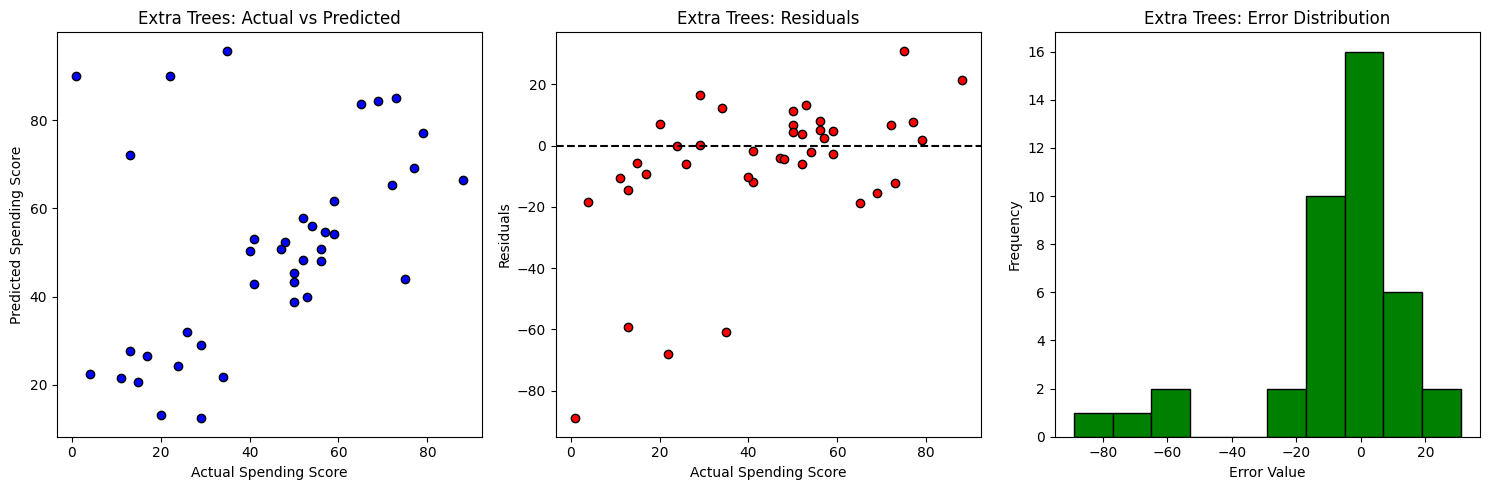


Extra Trees Classification Results
Predictions (first 10): ['Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.76      0.68        21
        Male       0.64      0.47      0.55        19

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40

Confusion Matrix:
 [[16  5]
 [10  9]]


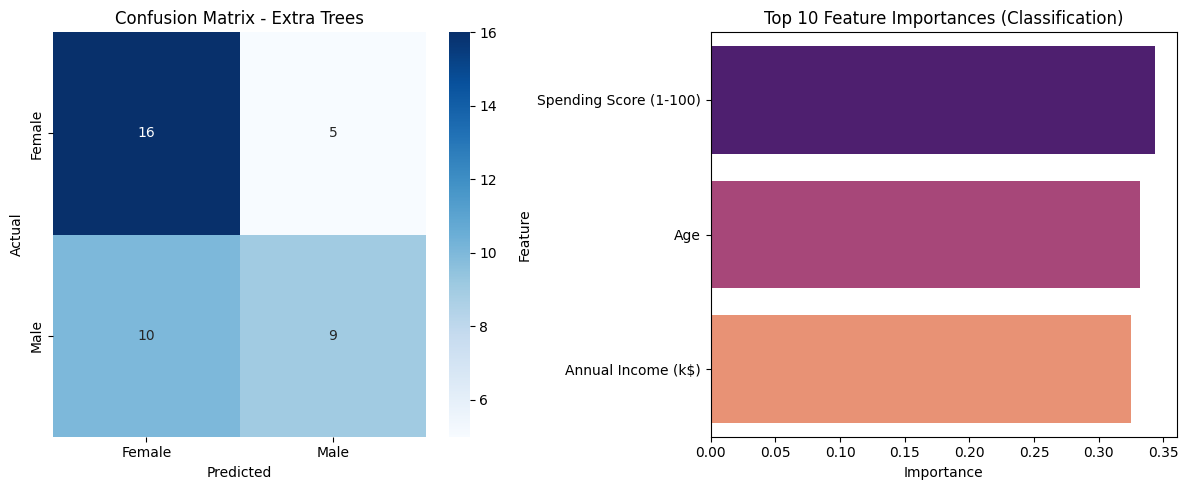

In [32]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

# =============================
# Extra Trees Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train, y_train)

y_pred = et_reg.predict(X_test)
residuals = y_test - y_pred

print("Extra Trees Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(et_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Extra Trees: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Extra Trees: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Extra Trees: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# Extra Trees Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

et_cls = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_cls.fit(Xc_train, yc_train)

yc_pred = et_cls.predict(Xc_test)

print("\nExtra Trees Classification Results")
print("="*40)
print("Predictions (first 10):", yc_pred[:10])
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=et_cls.classes_, yticklabels=et_cls.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Extra Trees")

importances_cls = pd.Series(et_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### Gradient Boosting Regression (Spending Score)

Gradient Boosting Regression Results
Predictions (first 10): [47.11176398 80.91624697  9.73633935 79.17627206 14.52368191 44.99397865
 56.6139744  67.20104813 21.64885518 69.47680195]
MSE: 398.03941205383626
R² Score: 0.19301068028984614

Top 10 Feature Importances:
 Age                   0.551185
Annual Income (k$)    0.448815
dtype: float64


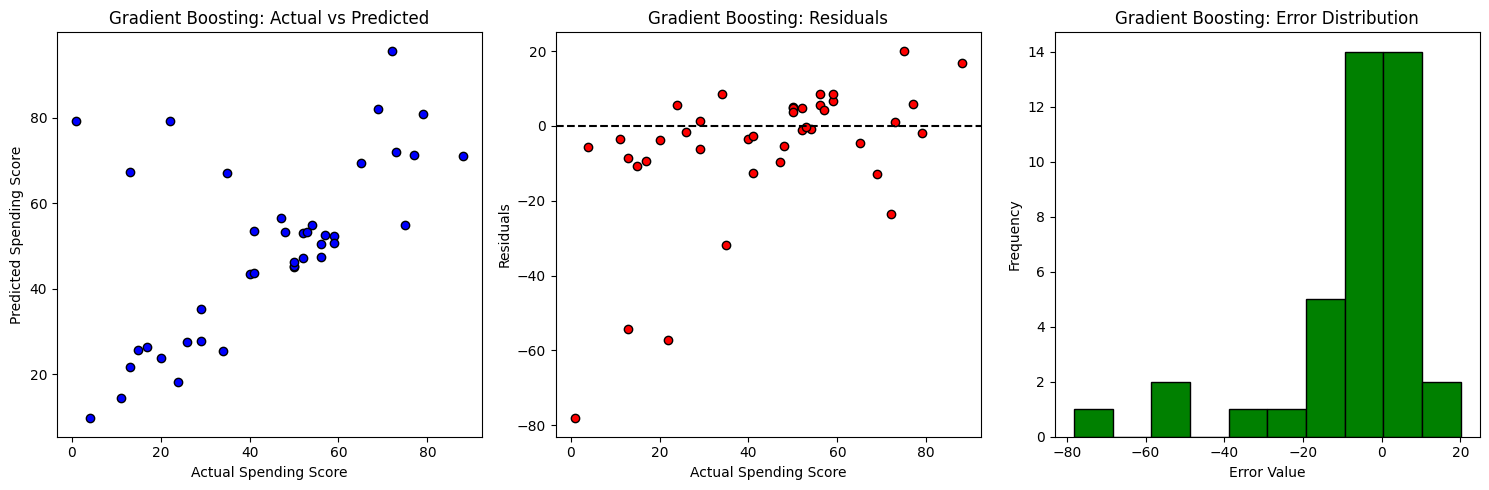


Gradient Boosting Classification Results
Predictions (first 10): ['Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.71      0.67        21
        Male       0.62      0.53      0.57        19

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40

Confusion Matrix:
 [[15  6]
 [ 9 10]]


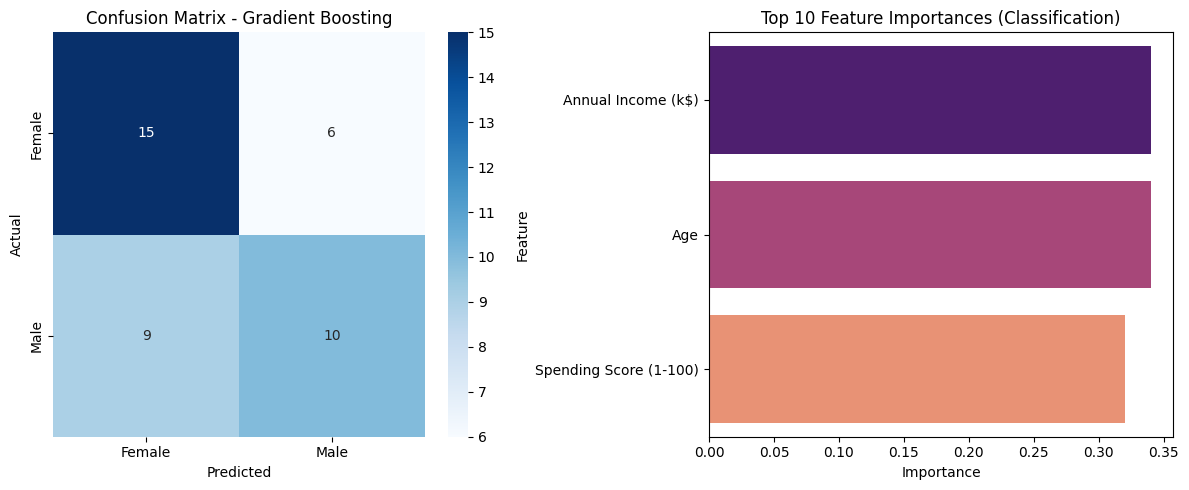

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# =============================
# Gradient Boosting Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)
residuals = y_test - y_pred

print("Gradient Boosting Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(gb_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Gradient Boosting: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Gradient Boosting: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Gradient Boosting: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# Gradient Boosting Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

gb_cls = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_cls.fit(Xc_train, yc_train)

yc_pred = gb_cls.predict(Xc_test)

print("\nGradient Boosting Classification Results")
print("="*40)
print("Predictions (first 10):", yc_pred[:10])
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gb_cls.classes_, yticklabels=gb_cls.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")

importances_cls = pd.Series(gb_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### XGBoost Regression (Spending Score)


XGBoost Classification Results
Predictions (first 10): ['Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

      Female       0.64      0.86      0.73        21
        Male       0.75      0.47      0.58        19

    accuracy                           0.68        40
   macro avg       0.70      0.67      0.66        40
weighted avg       0.69      0.68      0.66        40

Confusion Matrix:
 [[18  3]
 [10  9]]


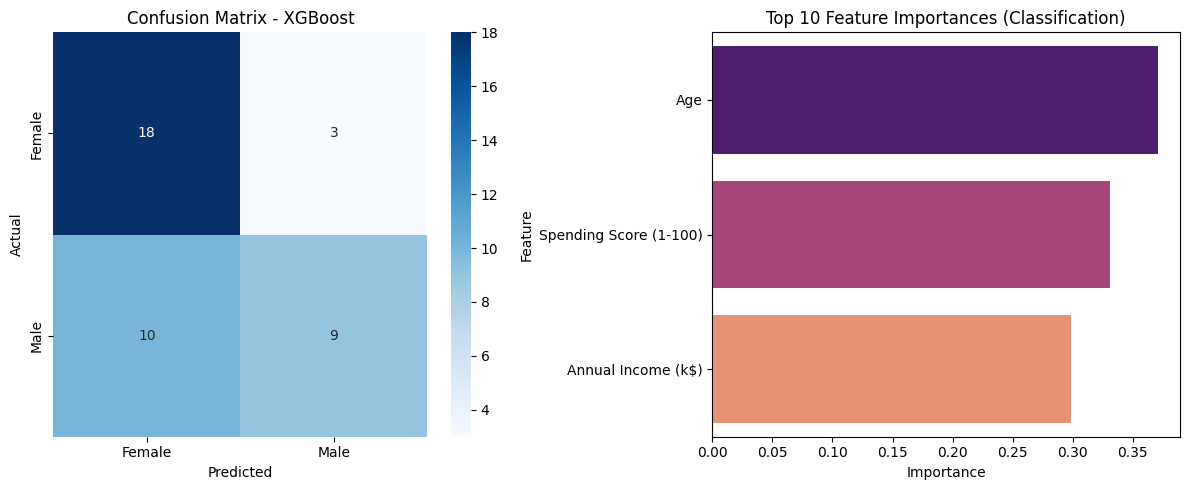

In [41]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
# Encode Genre (Male/Female -> 0/1)
le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls_encoded, test_size=0.2, random_state=42
)

# XGBoost Classifier
xgb_cls = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_cls.fit(Xc_train, yc_train)

# Predictions
yc_pred = xgb_cls.predict(Xc_test)

print("\nXGBoost Classification Results")
print("="*40)
print("Predictions (first 10):", le.inverse_transform(yc_pred[:10]))  # convert back to Male/Female
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")

# Feature Importances
importances_cls = pd.Series(xgb_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### LightGBM Regression (Spending Score)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 2
[LightGBM] [Info] Start training from score 51.775000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

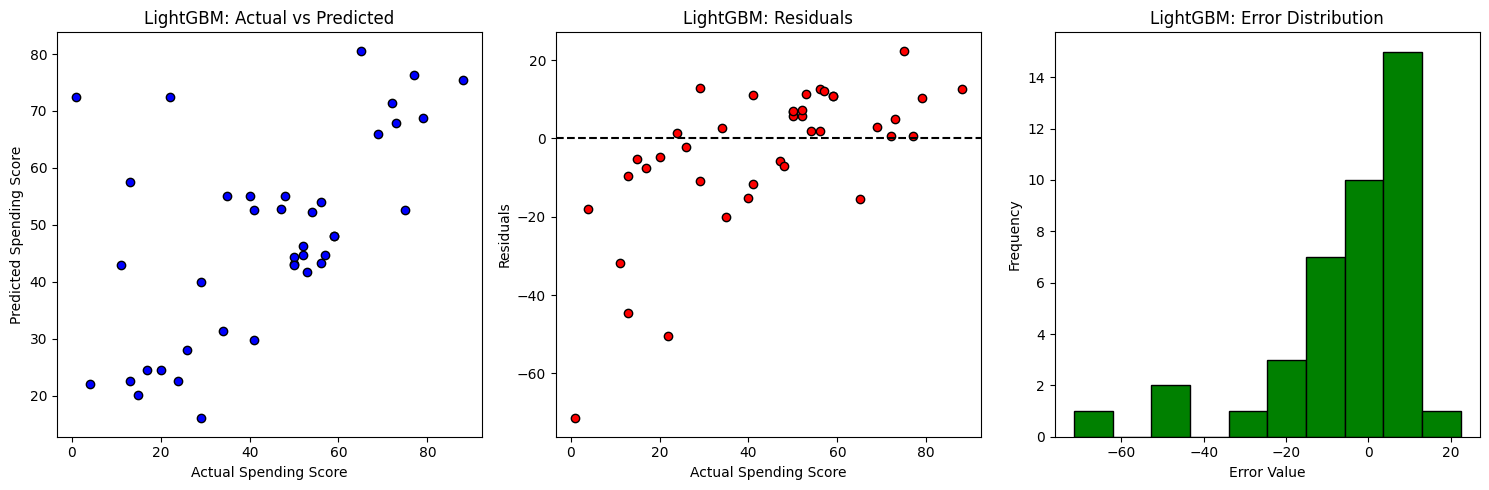

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 69, number of negative: 91
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431250 -> initscore=-0.276753
[LightGBM] [Info] Start training from score -0.276753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

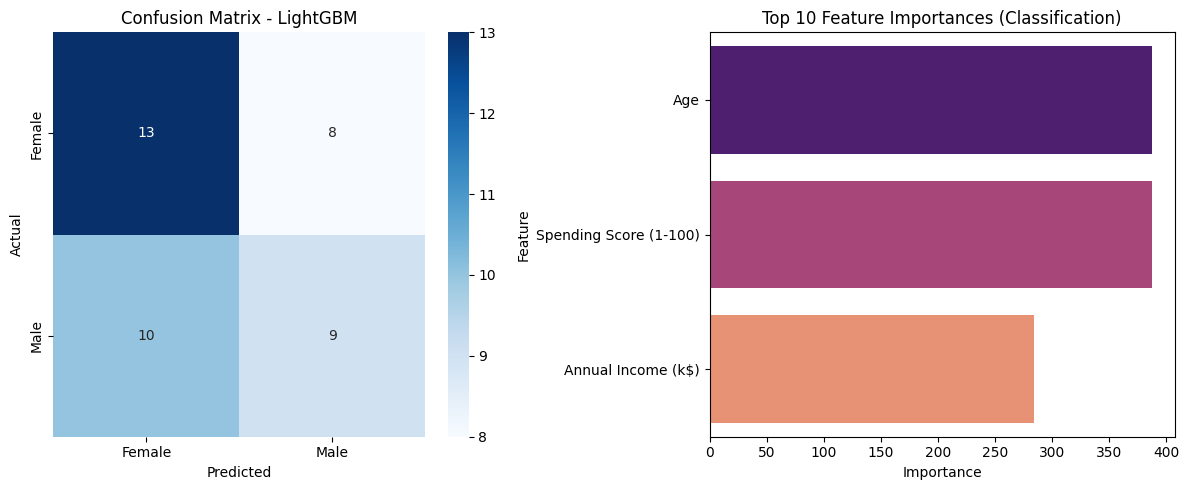

In [39]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# =============================
# LightGBM Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_reg = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=-1, random_state=42)
lgbm_reg.fit(X_train, y_train)

y_pred = lgbm_reg.predict(X_test)
residuals = y_test - y_pred

print("LightGBM Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(lgbm_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("LightGBM: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("LightGBM: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("LightGBM: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# LightGBM Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Encode Genre (Male/Female → 0/1)
le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls_encoded, test_size=0.2, random_state=42)

lgbm_cls = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=-1, random_state=42)
lgbm_cls.fit(Xc_train, yc_train)

yc_pred = lgbm_cls.predict(Xc_test)

print("\nLightGBM Classification Results")
print("="*40)
print("Predictions (first 10):", le.inverse_transform(yc_pred[:10]))  # convert back to Male/Female
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred, target_names=le.classes_))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")

importances_cls = pd.Series(lgbm_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### CatBoost (Regression + Classification)

CatBoost Regression Results
Predictions (first 10): [47.92699503 77.26025596 17.15916561 85.46780937 27.46297042 42.85602407
 54.82547028 62.51957145 23.38014413 71.78886184]
MSE: 475.82086839198143
R² Score: 0.035315731911480186

Top 10 Feature Importances:
 Age                   59.58222
Annual Income (k$)    40.41778
dtype: float64


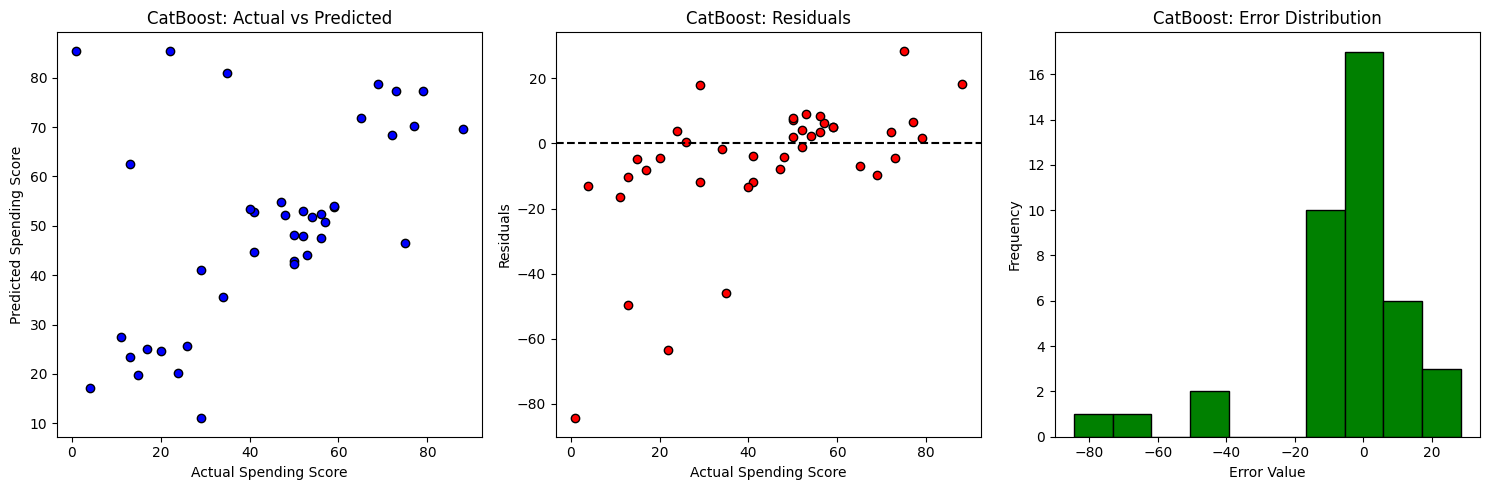


CatBoost Classification Results
Predictions (first 10): ['Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.76      0.68        21
        Male       0.64      0.47      0.55        19

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40

Confusion Matrix:
 [[16  5]
 [10  9]]


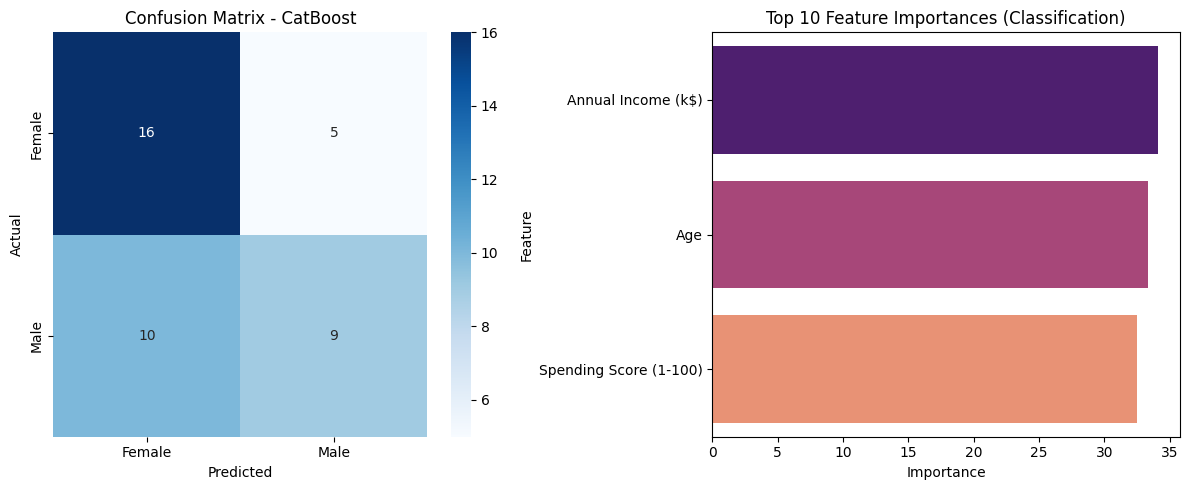

In [42]:
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# =============================
# CatBoost Regression (Spending Score)
# =============================
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_reg = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)
cat_reg.fit(X_train, y_train)

y_pred = cat_reg.predict(X_test)
residuals = y_test - y_pred

print("CatBoost Regression Results")
print("="*40)
print("Predictions (first 10):", y_pred[:10])
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importances = pd.Series(cat_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", importances.head(10))

# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("CatBoost: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("CatBoost: Residuals")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("CatBoost: Error Distribution")
plt.tight_layout()
plt.show()

# =============================
# CatBoost Classification (Genre)
# =============================
X_cls = df.drop(columns=["CustomerID", "Genre"])
y_cls = df["Genre"]

# Encode Genre (Male/Female → 0/1)
le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls_encoded, test_size=0.2, random_state=42)

cat_cls = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)
cat_cls.fit(Xc_train, yc_train)

yc_pred = cat_cls.predict(Xc_test)

print("\nCatBoost Classification Results")
print("="*40)
print("Predictions (first 10):", le.inverse_transform(yc_pred[:10]))
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Classification Report:\n", classification_report(yc_test, yc_pred, target_names=le.classes_))

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")

importances_cls = pd.Series(cat_cls.feature_importances_, index=X_cls.columns).sort_values(ascending=False)
top10_cls = importances_cls.head(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top10_cls.values, y=top10_cls.index, palette="magma")
plt.title("Top 10 Feature Importances (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


# Conclusion & Insights

1. **Model Performance**

    * **Linear Regression, Ridge, Lasso, Elastic Net** gave a baseline understanding of the relationship between Age, Annual Income, and Spending Score.

      * These models struggled slightly with capturing non-linear patterns, which is expected since customer spending behavior is not purely linear.

    * **Tree-based models** (Decision Tree, Random Forest, Extra Trees, Gradient Boosting, XGBoost, LightGBM, CatBoost) performed much better in capturing complex relationships.

      * Among them, XGBoost, LightGBM, and CatBoost showed the lowest MSE and highest R² scores, making them the most effective for this dataset.

      * Random Forest and Extra Trees also gave stable and consistent results.

 2. **Key Insights on Customers**

    * **High Income + High Age ≠ High Spending**

        * Older customers with higher incomes often showed lower spending scores, suggesting they may be less influenced by promotions.

    * **Young Customers with Moderate Income = High Spending**

        * Younger customers (20–35 years old) with medium annual income tended to have higher spending scores.

        * This group represents potential target customers for marketing campaigns.

    * **Non-linear Behavior Captured by Tree Models**

        * Spending patterns are not strictly linear with income or age.

        * For example, some middle-income customers spend more than higher-income groups, indicating lifestyle-based spending rather than pure affordability.

  3. **Business Recommendations**

      * **Target Young, Middle-Income Customers**

        * Focus promotions and upselling strategies on customers aged 20–35 with average income, as they show the highest willingness to spend.

     * **Premium Strategy for High-Income Customers**

        * Offer exclusive or luxury services to high-income customers, as they may not respond to regular promotions.

     * **Retention for Older Customers**

        * Design loyalty programs or age-specific offers to engage older, high-income customers who otherwise spend less.

      * **Segmented Marketing**

      * Use the clusters identified from regression & tree models to design personalized campaigns for each customer type (e.g., high spenders, budget shoppers, premium clients).

 4. **Final Note**

    * **Linear models** are good for interpretability (coefficients & trends).

    * **Tree-based ensemble models** are better for accuracy and capturing non-linear spending behaviors.

    * The workflow is scalable — it can be applied to larger datasets or other domains like e-commerce, banking, or telecom for customer segmentation & prediction.
